In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk(r'F:\MLOps\MLOps\data\raw'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

F:\MLOps\MLOps\data\raw\.gitkeep
F:\MLOps\MLOps\data\raw\test.zip
F:\MLOps\MLOps\data\raw\train.zip
F:\MLOps\MLOps\data\raw\train.csv
F:\MLOps\MLOps\data\raw\test.csv
F:\MLOps\MLOps\data\raw\train_wo_outliers.csv


In [2]:
from pathlib import Path
from zipfile import ZipFile

In [3]:
train_path = r'F:\MLOps\MLOps\data\raw\train.zip'
test_path = r'F:\MLOps\MLOps\data\raw\test.zip'

In [7]:
def extract_zip_file(filepath):
    output_path = Path(r'F:\MLOps\MLOps\data\raw')
    output_path.mkdir(parents=True,exist_ok=True)
    with ZipFile(file=filepath) as f:
        f.extractall(path=output_path)  
        
extract_zip_file(train_path)
extract_zip_file(test_path)

In [4]:
train_df = pd.read_csv(r'F:\MLOps\MLOps\data\raw\train.csv')
test_df = pd.read_csv(r'F:\MLOps\MLOps\data\raw\test.csv')

print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (1458644, 11)
Test shape: (625134, 9)


# Data Exploration

Data fields

id - a unique identifier for each trip.

vendor_id - a code indicating the provider associated with the trip record.

pickup_datetime - date and time when the meter was engaged. Fmt YYYY-MM-DD HH:MM:SS

dropoff_datetime - date and time when the meter was disengaged. Fmt YYYY-MM-DD HH:MM:SS

passenger_count - the number of passengers in the vehicle (driver entered value).

pickup_longitude - the longitude where the meter was engaged.

pickup_latitude - the latitude where the meter was engaged.

dropoff_longitude - the longitude where the meter was disengaged.

dropoff_latitude - the latitude where the meter was disengaged.

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

trip_duration - duration of the trip in seconds.

In [5]:
# Random 20 data visualization
train_df.sample(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1672,id1749339,2,2016-05-11 11:54:06,2016-05-11 12:00:08,1,-73.980186,40.778980,-73.984062,40.770710,N,362
1119551,id1741296,1,2016-05-22 22:13:38,2016-05-22 22:25:10,3,-73.986305,40.758251,-74.006348,40.733105,N,692
1146718,id3738851,2,2016-03-14 08:31:53,2016-03-14 08:38:45,1,-74.007065,40.730251,-73.992416,40.737129,N,412
1062913,id2920144,1,2016-02-25 06:12:03,2016-02-25 06:21:58,1,-73.992722,40.727718,-74.009056,40.703861,N,595
245228,id0891159,2,2016-06-02 12:38:18,2016-06-02 12:44:24,2,-73.996094,40.748611,-73.999237,40.754456,N,366
1402419,id3649262,2,2016-05-05 11:44:05,2016-05-05 12:11:13,1,-73.975037,40.760841,-73.999100,40.720249,N,1628
582315,id0017667,2,2016-05-04 00:03:39,2016-05-04 00:15:41,1,-74.001808,40.724579,-73.993378,40.714291,N,722
1267077,id0979387,2,2016-03-24 11:04:10,2016-03-24 11:31:44,2,-73.973190,40.757801,-74.015106,40.714291,N,1654
149424,id2686398,1,2016-02-25 16:23:14,2016-02-25 16:46:21,1,-73.996246,40.753628,-73.955048,40.786064,N,1387
1342660,id1999609,2,2016-05-24 04:41:35,2016-05-24 05:08:05,1,-73.947609,40.771889,-73.789932,40.646931,N,1590


In [6]:
# check for missing values in train set
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
# check for missing values in test set
test_df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [8]:
# Extracting the relevant numerical columns to run describe on
cols_to_describe_num = [col for col in train_df.columns if train_df[col].dtype != 'object'] 
cols_to_describe_num = cols_to_describe_num[-5:]
cols_to_describe_num

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration']

In [9]:
train_df[cols_to_describe_num].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Insights from the describe method:

Regarding the features:

pickup_longitude: The range of values from -121.9 (min) to -61.33 (max) exceeds the borders of NYC (actual longitude range 71° 51′ W to 79° 46′ W). However, the median longitude of approximately -73.9 seems appropriate. .

pickup_latitude: The maximum value of 51.88 raises concerns (actual range 40.4774° N and 40.9176° N).

dropoff_longitude: Similar to pickup longitude.

dropoff_latitude: The minimum value of 32.181 is concerning (actual range 40.4774° N and 40.9176° N).

Regarding the Target Column (trip_duration):

The mean duration is 959 seconds, and the median is 662 seconds, indicating a right-skewed distribution (Mean > Median), suggesting outliers.

The minimum trip duration of 1 second suggests ride cancellations or rejections by the driver after reaching the pickup spot.

The maximum trip duration of 3.526282e+06 seconds (980 minutes) is an outlier and should be addressed.

75% of the rides in NYC are under 1075 seconds/18 minutes.

In [10]:
# Extracting the relevant categorical column info
cols_to_describe_cat = [col for col in train_df.columns if col not in cols_to_describe_num]
cols_to_describe_cat = np.array(cols_to_describe_cat)[[1,4,5]]
cols_to_describe_cat

array(['vendor_id', 'passenger_count', 'store_and_fwd_flag'], dtype='<U18')

In [11]:
# value counts of each categorical column 
for col in cols_to_describe_cat:
    print(f'The unique value in {col}:',np.sort(train_df[col].unique()))
    print(train_df[col].value_counts())  

The unique value in vendor_id: [1 2]
vendor_id
2    780302
1    678342
Name: count, dtype: int64
The unique value in passenger_count: [0 1 2 3 4 5 6 7 8 9]
passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64
The unique value in store_and_fwd_flag: ['N' 'Y']
store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [13]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [14]:
# convert the trip duration col to minutes for easier understanding
target_col = 'trip_duration'
target_col_minutes = train_df[target_col] / 60

In [15]:
target_col_minutes.describe().reset_index()

,index,trip_duration
0,count,1.458644e+06
1,mean,1.599154e+01
2,std,8.729053e+01
3,min,1.666667e-02
4,25%,6.616667e+00
5,50%,1.103333e+01
6,75%,1.791667e+01
7,max,5.877137e+04


In [16]:
# number of 'equal or less than a minute' trips
len(train_df.loc[train_df[target_col]<=60])

8777

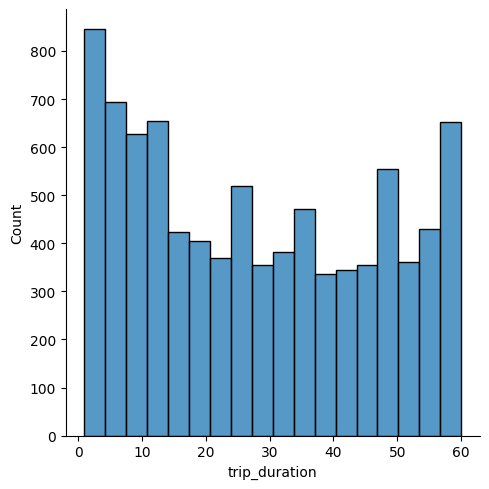

In [17]:
# distribution of target column of trips less than a minute
sns.displot(x=train_df.loc[train_df[target_col]<=60][target_col], kind='hist')
plt.show()

In [18]:
# number of trip durations equal to 1 sec
len(train_df.loc[train_df[target_col] == 1])

33

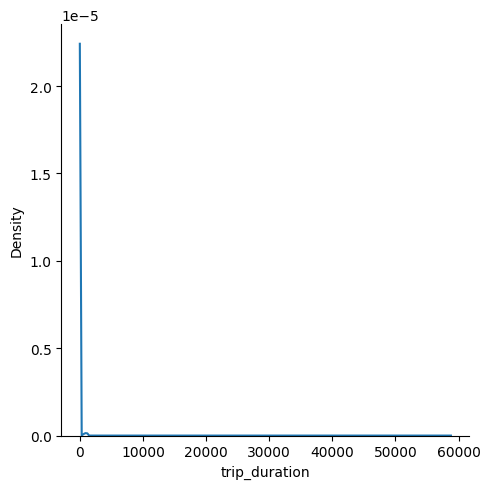

In [19]:
sns.displot(x=target_col_minutes, kind='kde')
plt.show()

#demonstrates right skewness

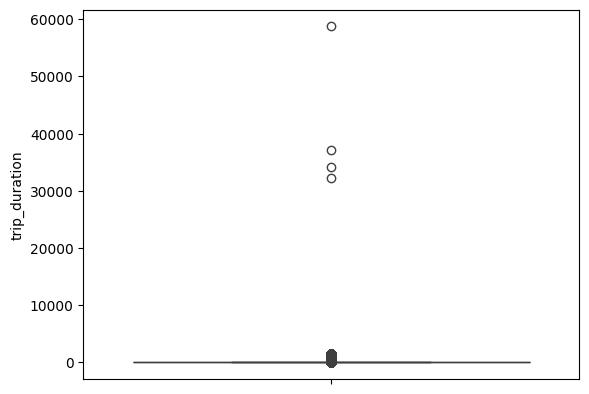

In [20]:
sns.boxplot(target_col_minutes)
plt.show()

In [21]:
# investigate visible outliers in the box plot above to show trip duration in minutes
target_col_minutes[target_col_minutes > 10000] / 60

355003    538.815556
680594    569.327222
924150    618.781111
978383    979.522778
Name: trip_duration, dtype: float64

In [22]:
train_df[target_col_minutes > 10000] #these can be dropped

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


In [23]:
# drop
train_df.drop(train_df[train_df['trip_duration'] >= 1939736].index, inplace=True)


In [24]:
train_df['trip_duration'].describe()

count    1.458640e+06
mean     9.528153e+02
std      3.171322e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      8.639200e+04
Name: trip_duration, dtype: float64

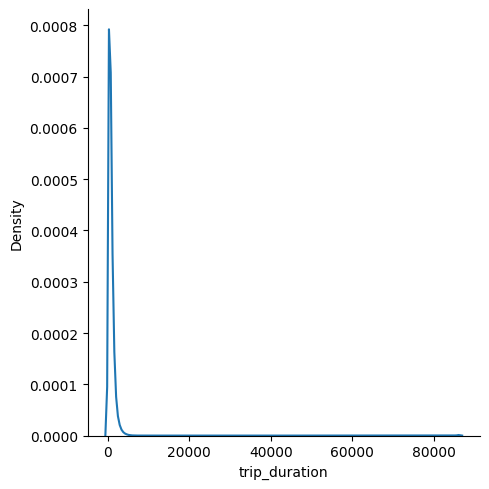

In [25]:
sns.displot(x=train_df[target_col], kind='kde')
plt.show()

In [26]:
8.639200e+04 / 3600 # still shows a max of trip that is 24-hour long which is also extreme

23.997777777777777

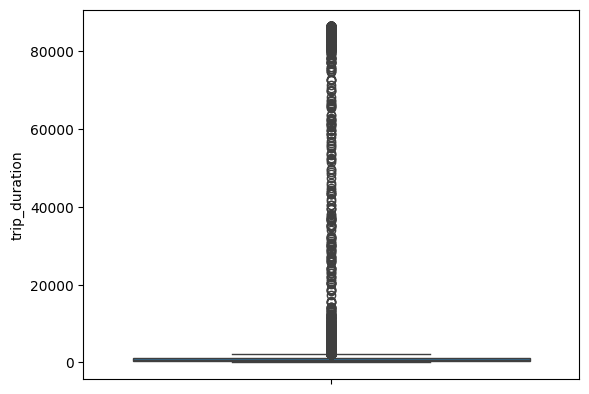

In [27]:
sns.boxplot(train_df[target_col])
plt.show()

In [28]:
train_df[target_col].describe()

count    1.458640e+06
mean     9.528153e+02
std      3.171322e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      8.639200e+04
Name: trip_duration, dtype: float64

In [29]:
# calculate the upper limit based on the IQR approach

Q1_target, Q3_target = train_df[target_col].quantile([0.25,0.75])
IQR = Q3_target - Q1_target

print(f'Q1={Q1_target:.2f} seconds    ',f'Q3={Q3_target:.2f} seconds')
print(f'IQR={IQR:.2f} seconds')

upper_bound_target = Q3_target +  (1.5 * IQR)
print(f'Upper Bound={upper_bound_target:.2f} seconds')

lower_bound_target = Q3_target -  (1.5 * IQR)
print(f'Lower Bound={lower_bound_target:.2f} seconds')

Q1=397.00 seconds     Q3=1075.00 seconds
IQR=678.00 seconds
Upper Bound=2092.00 seconds
Lower Bound=58.00 seconds


In [30]:
target_hours = train_df['trip_duration']/3600
upper_bound_target_hours = upper_bound_target/3600

In [31]:
(target_hours > upper_bound_target_hours)

0          False
1          False
2           True
3          False
4          False
           ...  
1458639    False
1458640    False
1458641    False
1458642    False
1458643    False
Name: trip_duration, Length: 1458640, dtype: bool

In [32]:
# distribution of pickup latitude and logitude of above upper limit
x_temp = train_df.loc[(target_hours > upper_bound_target_hours),:].copy()
x_temp.loc[:,'trip_duration'] = x_temp['trip_duration']/3600

In [33]:
x_temp['trip_duration']

2          0.590000
16         0.643333
24         0.690278
29         0.647500
33         0.630278
             ...   
1458571    0.681667
1458584    0.648611
1458589    0.581389
1458600    1.061389
1458621    0.654167
Name: trip_duration, Length: 74216, dtype: float64

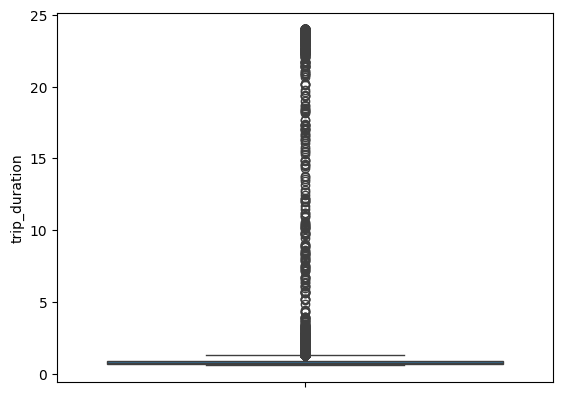

In [34]:
# boxplot for the target column
sns.boxplot(data=x_temp,y='trip_duration')
plt.show()

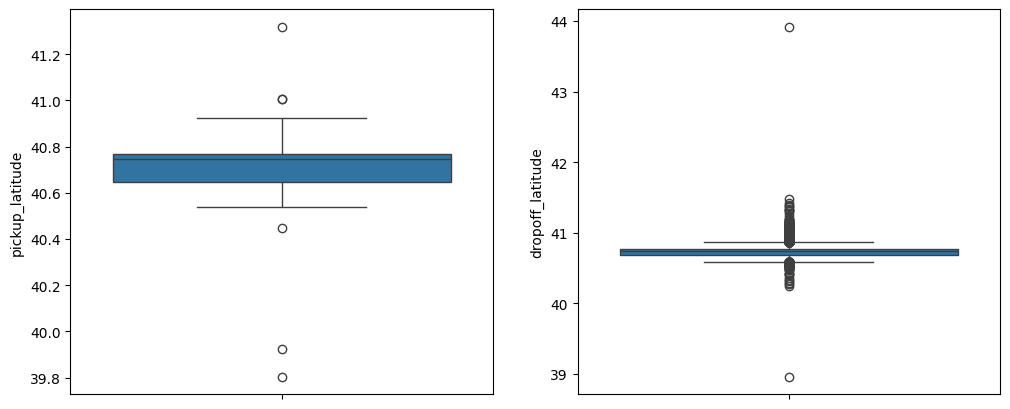

In [35]:
# boxplot for latitudes
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_temp,y='pickup_latitude')
plt.subplot(1,2,2)
sns.boxplot(data=x_temp,y='dropoff_latitude')
plt.show()

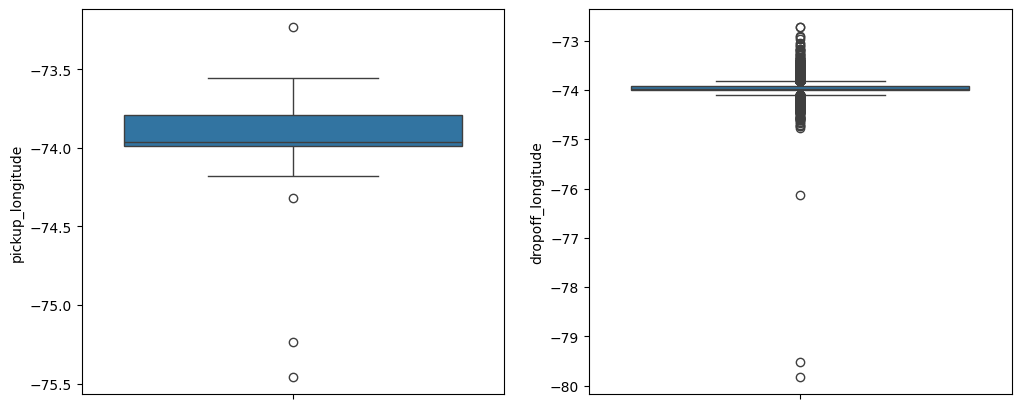

In [36]:
# boxplot for longitudes
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_temp,y='pickup_longitude')
plt.subplot(1,2,2)
sns.boxplot(data=x_temp,y='dropoff_longitude')
plt.show()

In [37]:
def detect_outliers(data,columns,fold=1.5):
    data_temp = data.copy()
    new_df = pd.DataFrame(columns=columns)
    for col in columns:
        Q1, Q3 = data_temp[col].quantile([0.25,0.75])
        IQR = Q3 - Q1
        upper_bound = Q3 +  (fold * IQR)
        lower_bound = Q1 -  (fold * IQR)
        filter_data = data_temp.loc[(data_temp[col] <= lower_bound) | (data_temp[col] >= upper_bound)]
        new_df = pd.concat([new_df,filter_data])
    
    return new_df

In [38]:
# outliers in co ordinates

detect_outliers(data=x_temp,columns=['pickup_latitude'])

,pickup_latitude,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
66344,41.006001,id0240882,1.0,2016-03-11 11:09:48,2016-03-11 12:36:54,1.0,-73.688805,-74.005753,40.725510,N,1.451667
73414,41.319164,id0098463,1.0,2016-03-30 19:32:16,2016-03-30 20:25:26,2.0,-74.126724,-73.935120,40.829666,N,0.886111
114376,39.803932,id1311087,1.0,2016-02-29 12:16:29,2016-02-29 18:47:09,3.0,-75.455917,-73.796021,40.707726,N,6.511111
981237,40.446159,id2004335,2.0,2016-05-02 23:45:19,2016-05-03 00:48:37,1.0,-74.317749,-73.987099,40.723618,N,1.055000
1226891,41.003960,id2571106,1.0,2016-01-17 17:10:42,2016-01-17 17:47:33,1.0,-73.682144,-73.913017,40.767632,Y,0.614167
1416336,39.923027,id3795134,1.0,2016-03-21 20:54:00,2016-03-22 01:43:23,3.0,-75.238327,-73.922577,40.610130,N,4.823056


In [39]:
# outliers in co ordinates
detect_outliers(data=x_temp,columns=['dropoff_latitude'],fold=5)

,dropoff_latitude,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,store_and_fwd_flag,trip_duration
14502,41.311520,id1092161,1.0,2016-04-15 22:35:08,2016-04-16 00:34:21,1.0,-73.781792,40.644718,-72.711395,N,1.986944
108729,41.181141,id2000225,2.0,2016-01-15 20:25:02,2016-01-15 21:10:39,1.0,-73.863182,40.769417,-73.849640,N,0.760278
112247,41.334740,id0479538,1.0,2016-01-02 20:50:36,2016-01-02 22:18:34,1.0,-73.789871,40.643410,-73.684250,N,1.466111
136925,41.143021,id1493150,2.0,2016-02-28 22:13:20,2016-02-28 23:31:55,2.0,-73.990723,40.749851,-73.258476,N,1.309722
189789,41.197395,id2172310,2.0,2016-06-08 17:25:27,2016-06-08 18:44:37,1.0,-73.872871,40.774067,-73.725464,N,1.319444
231336,41.201595,id2108994,1.0,2016-05-19 11:29:19,2016-05-19 12:38:19,1.0,-73.788795,40.642273,-73.684677,N,1.150000
236614,40.293289,id3765151,1.0,2016-04-09 12:20:12,2016-04-09 13:28:22,1.0,-73.992142,40.751850,-74.647537,N,1.136111
273277,41.134434,id3572837,2.0,2016-01-27 23:01:44,2016-01-27 23:49:33,1.0,-73.996887,40.744556,-73.854599,N,0.796944
396966,41.480755,id3476102,1.0,2016-02-19 20:03:37,2016-02-19 21:32:20,1.0,-73.784843,40.648506,-73.625992,N,1.478611
397526,38.963852,id0982904,1.0,2016-04-28 13:32:14,2016-04-28 14:14:09,2.0,-73.870682,40.773598,-79.817978,N,0.698611


In [40]:
x_temp['passenger_count'].value_counts()

passenger_count
1    49654
2    12682
5     4224
3     3338
6     2528
4     1786
0        4
Name: count, dtype: int64

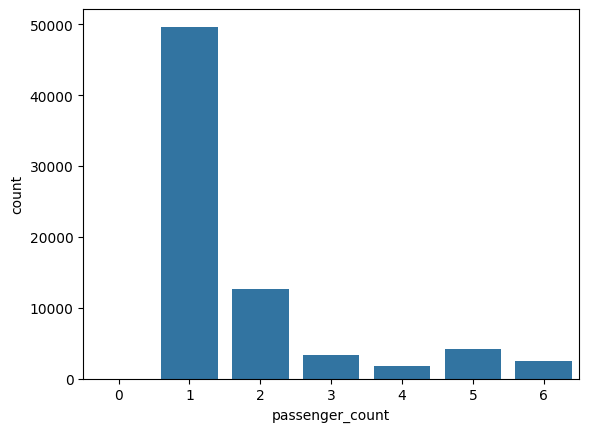

In [41]:
# distribution of passenger count
sns.countplot(data=x_temp,x='passenger_count')
plt.show()

In [42]:
# 0 passenger rides must be investigated
x_temp[x_temp['passenger_count'] == 0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,23.861389
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,0.625278
676906,id0878599,1,2016-01-25 08:46:58,2016-01-25 09:41:01,0,-73.928078,40.736412,-73.985519,40.758972,N,0.900833
1257574,id1205792,1,2016-03-11 12:33:17,2016-03-11 13:09:48,0,-73.982063,40.763798,-74.188072,40.694042,N,0.608611


In [43]:
# passenger count and vendor id
pd.crosstab(index=x_temp['passenger_count'],columns=x_temp['vendor_id'],normalize='columns') * 100

vendor_id,1,2
passenger_count,,
0,0.009223,0.002399
1,72.649021,62.422338
2,19.677826,15.067047
3,4.595899,4.421043
4,2.914323,2.010219
5,0.104522,10.051095
6,0.049187,6.025859


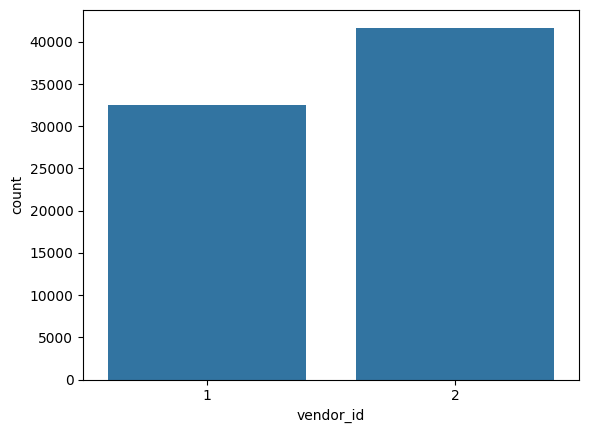

In [44]:
# distribution of passenger count
sns.countplot(data=x_temp,x='vendor_id')
plt.show()

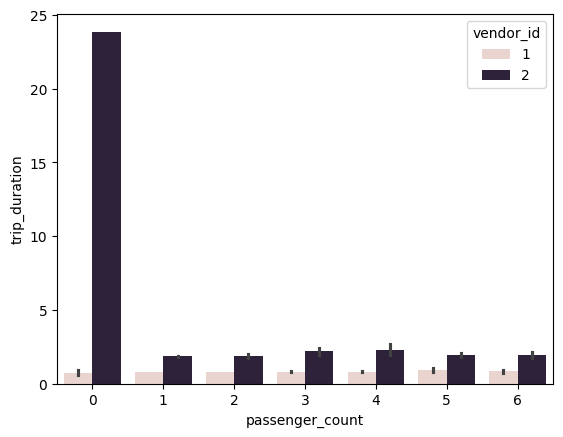

In [45]:
# avg trip duration in hours based on passenger count
sns.barplot(data=x_temp,x='passenger_count',y='trip_duration',hue='vendor_id')
plt.show()

---------

In [46]:
# since the above plot shows the max of 24 hour trip for vendor 2 with passenger 0, let's investigate how many data points are above a 100 minute mark, and drop outliers accordingly
time_ranges = np.arange(100,1100,100)
prev_val = 0
for time in time_ranges:
    new_val = target_col_minutes[target_col_minutes >= time].size
    print(f'{time} = {new_val}      diff={np.abs(new_val-prev_val)}')
    prev_val = new_val

100 = 2567      diff=2567
200 = 2096      diff=471
300 = 2072      diff=24
400 = 2053      diff=19
500 = 2032      diff=21
600 = 2012      diff=20
700 = 1995      diff=17
800 = 1984      diff=11
900 = 1973      diff=11
1000 = 1961      diff=12


In [47]:
# taking datapoints that have trip_duration less than or equal to around 3 hours
normal_durations_df = train_df.loc[(train_df['trip_duration']/60) < 200,:].copy()
normal_durations_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [48]:
# number of rows in data with trip duration higher than 200 min
(target_col_minutes > 200).sum() 

2096

In [49]:
# save the data where the trip duration (target) is till 200 min
df_path = (r'F:\MLOps\MLOps\data\raw\train_wo_outliers.csv')
normal_durations_df.to_csv(df_path)

In [50]:
# drop and pickups of points where time was more than 200
extreme_time_durations_df = train_df.loc[(train_df['trip_duration']/60) >= 200,:]
extreme_time_durations_df


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,85197
...,...,...,...,...,...,...,...,...,...,...,...
1455097,id2798196,2,2016-03-20 03:51:36,2016-03-21 00:00:00,2,-73.969299,40.757301,-73.870277,40.709808,N,72504
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,86233
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,85311
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,86314


In [51]:
# borders of nyc 
latitude_coord = train_df['pickup_latitude'].quantile([0.01,0.99]).sort_values(ascending=False).values + np.array([0.05,-0.05])                                                                                                                                                                                                                             
longitude_coord = train_df['pickup_longitude'].quantile([0.01,0.99]).sort_values(ascending=False).values + np.array([0.1,-0.1])

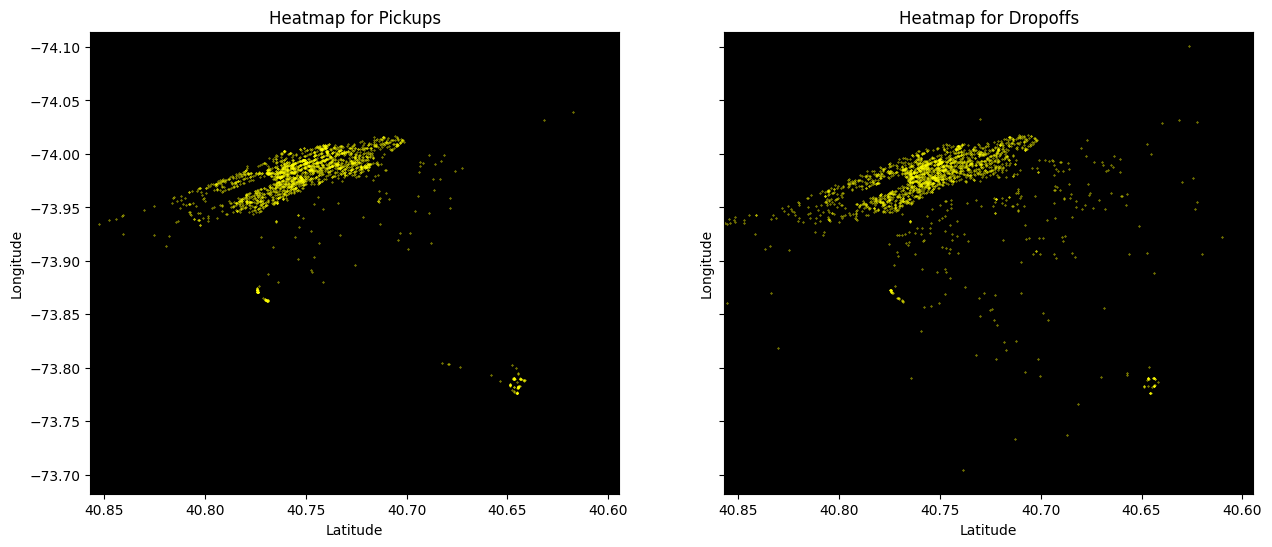

In [52]:
# heatmap of the pickups and dropoffs where trip duration was greater than 200 min

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(extreme_time_durations_df['pickup_latitude'],extreme_time_durations_df['pickup_longitude'],s=0.1,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(extreme_time_durations_df['dropoff_latitude'],extreme_time_durations_df['dropoff_longitude'],s=0.1,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

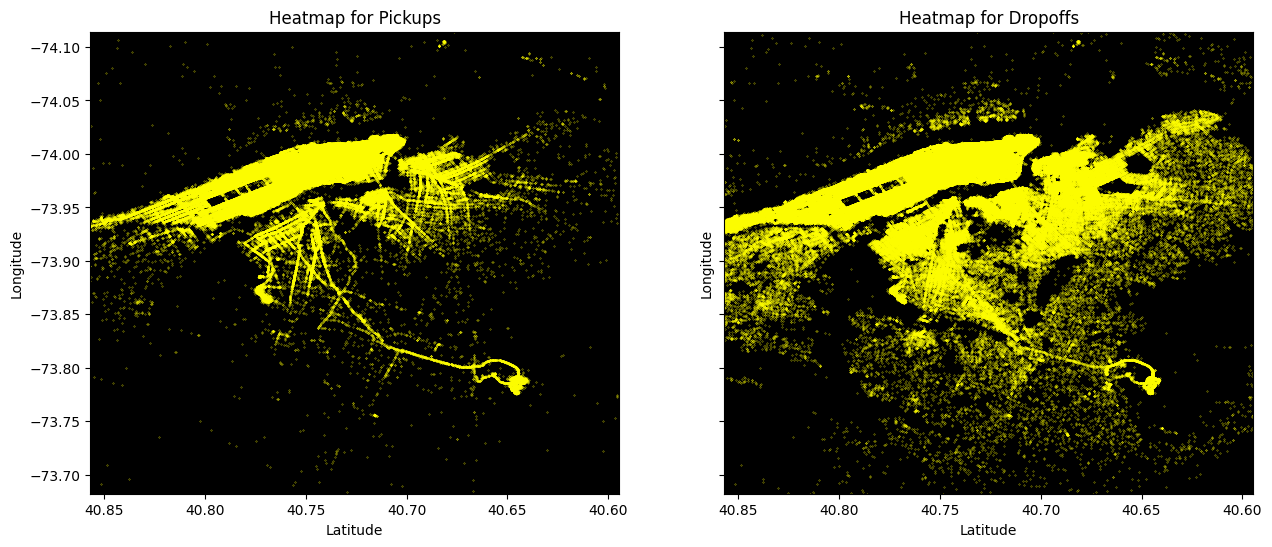

In [53]:
# heatmap of the pickups and dropoffs where trip duration was less than 200 min

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(normal_durations_df['pickup_latitude'],normal_durations_df['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(normal_durations_df['dropoff_latitude'],normal_durations_df['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

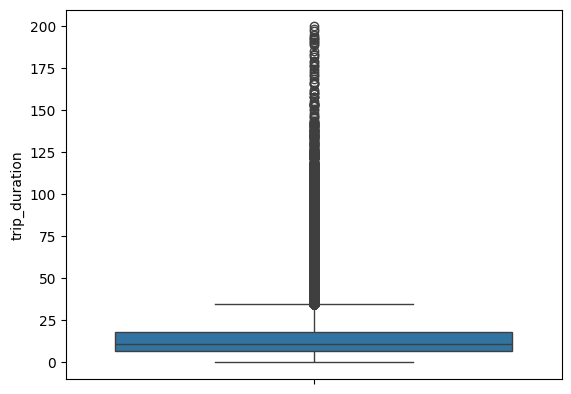

In [54]:
# distribution of target col when max time duration is less than or equals 200 min

sns.boxplot(target_col_minutes[target_col_minutes <= 200])
plt.show()

In [55]:
# passenger count in datasets
print(normal_durations_df['passenger_count'].unique())
print(extreme_time_durations_df['passenger_count'].unique())

[1 6 4 2 3 5 0 7 9 8]
[3 1 6 5 2 4 0]


In [56]:
normal_durations_df.loc[:,'trip_duration'] = normal_durations_df['trip_duration'] / 60
extreme_time_durations_df.loc[:,'trip_duration'] = extreme_time_durations_df['trip_duration'] / 60

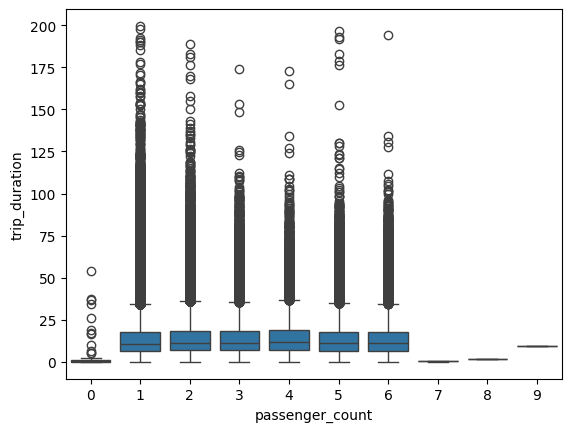

In [57]:
# box plots based on passenger count (To check whether passsenger count makes a diff)
sns.boxplot(data=normal_durations_df,x='passenger_count',y='trip_duration')
plt.show()

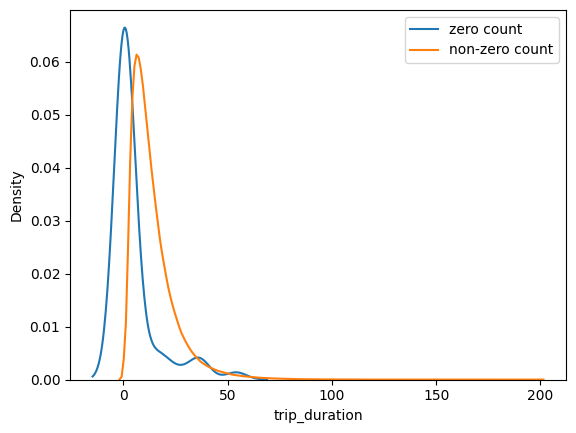

In [58]:
sns.kdeplot(data=normal_durations_df.loc[normal_durations_df['passenger_count'] == 0,:],x='trip_duration',label='zero count')
sns.kdeplot(data=normal_durations_df.loc[~(normal_durations_df['passenger_count'] == 0),:],x='trip_duration',label='non-zero count')
plt.legend()
plt.show()

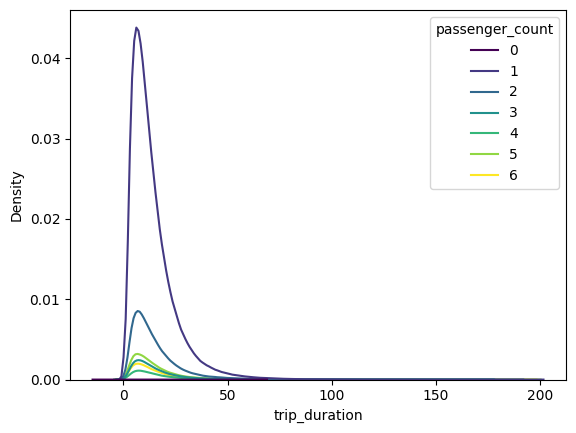

In [59]:
passenger_count_range = list(range(0,7))
sns.kdeplot(data=normal_durations_df.loc[normal_durations_df['passenger_count'].isin(passenger_count_range),:],
            x='trip_duration',hue='passenger_count',palette='viridis')
plt.show()

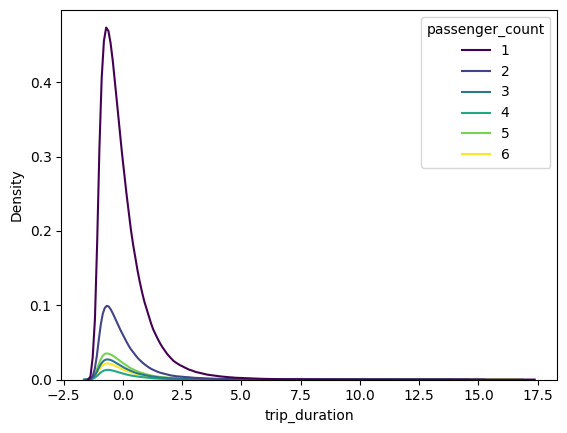

In [60]:
# kde plot for distribution based on passenger count (standardized)
passenger_count_grp = normal_durations_df.groupby('passenger_count')

#standardize each distribution

temp_df = pd.DataFrame()
temp_df['passenger_count'] = normal_durations_df['passenger_count'].copy()

temp_df['trip_duration'] = passenger_count_grp['trip_duration'].transform(lambda x: (x - x.mean()) / x.std())

passenger_count_range = list(range(1,7))

sns.kdeplot(data=temp_df.loc[temp_df['passenger_count'].isin(passenger_count_range),:],
            x='trip_duration',hue='passenger_count',palette='viridis')
plt.show()

In [61]:
# remove extreme values
extreme_time_durations_df = extreme_time_durations_df.loc[extreme_time_durations_df['trip_duration'] < 10000,:]

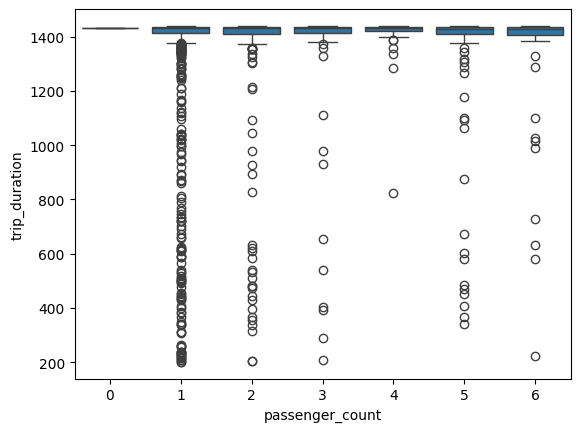

In [62]:
# box plots based on passenger count (To check whether passsenger count makes a diff)
sns.boxplot(data=extreme_time_durations_df,x='passenger_count',y='trip_duration')
plt.show()

In [63]:
# skewness of the output column
normal_durations_df['trip_duration'].skew()

2.3379728907695694

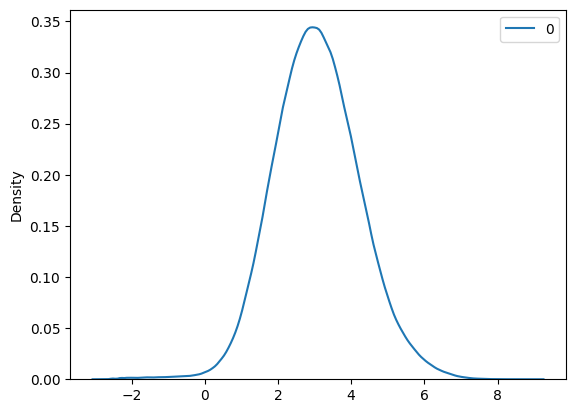

In [64]:
# apply box cox transformation

from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer(method='box-cox',standardize=False)

# transform the output column

trip_duration_trans = pt_target.fit_transform(normal_durations_df[['trip_duration']])

sns.kdeplot(trip_duration_trans)
plt.show()

## id

In [65]:
train_df['id'].head()

0    id2875421
1    id2377394
2    id3858529
3    id3504673
4    id2181028
Name: id, dtype: object

In [66]:
# remove the id tag from all the rows
def remove_id_tag(data):
    data['id'] = data['id'].str.replace('id','')
    return data['id']

# remove tag from train data
remove_id_tag(train_df)

0          2875421
1          2377394
2          3858529
3          3504673
4          2181028
            ...   
1458639    2376096
1458640    1049543
1458641    2304944
1458642    2714485
1458643    1209952
Name: id, Length: 1458640, dtype: object

In [67]:
# remove tag from test data
remove_id_tag(test_df)

0         3004672
1         3505355
2         1217141
3         2150126
4         1598245
           ...   
625129    3008929
625130    3700764
625131    2568735
625132    1384355
625133    0621643
Name: id, Length: 625134, dtype: object

In [68]:
# convert the id column to integer
train_df['id'] = train_df['id'].astype('int')
test_df['id'] = test_df['id'].astype('int')

In [69]:
# test if id column is required

def test_id_column(data):
    if data.shape[0] == data['id'].nunique():
        new_data = data.drop(columns='id')
        return new_data
    else:
        return data
    
train_df_new = test_id_column(train_df)
test_df_new = test_id_column(test_df)

In [70]:
train_df_new

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


## vendor_id

In [71]:
# categories in the vendor id column
train_df_new['vendor_id'].value_counts().sort_index()

vendor_id
1    678338
2    780302
Name: count, dtype: int64

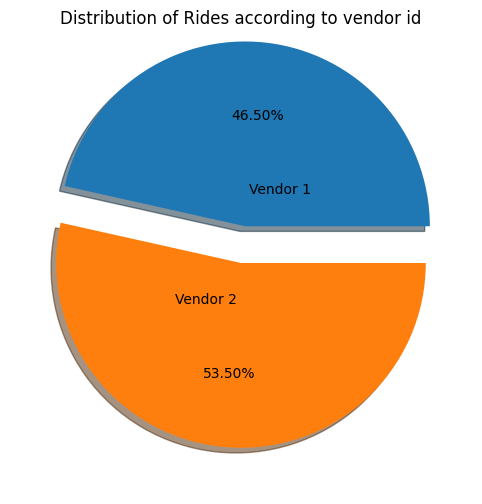

In [72]:
# pie chart showing distribution
fig = plt.figure(figsize=(12,6))
plt.pie(train_df_new['vendor_id'].value_counts().sort_index(),autopct='%.2f%%',
        explode=[0.2,0],shadow=True,labels=['Vendor 1','Vendor 2'],labeldistance=0.2)
plt.title('Distribution of Rides according to vendor id')
plt.show()

## pickup datetime

In [73]:
# change the column to datetime
train_df_new['pickup_datetime'] = pd.to_datetime(train_df_new['pickup_datetime'])
test_df_new['pickup_datetime'] = pd.to_datetime(test_df_new['pickup_datetime'])

In [74]:
train_df_new.shape

(1458640, 10)

In [75]:
train_df_new['pickup_datetime'].dt.weekday

0          0
1          6
2          1
3          2
4          5
          ..
1458639    4
1458640    6
1458641    4
1458642    1
1458643    1
Name: pickup_datetime, Length: 1458640, dtype: int32

In [76]:
# feature extraction

def make_datetime_features(data,column_type):
    data[f'{column_type}_hour'] = data[f'{column_type}_datetime'].dt.hour 
    data[f'{column_type}_date'] = data[f'{column_type}_datetime'].dt.day
    data[f'{column_type}_month'] = data[f'{column_type}_datetime'].dt.month
    data[f'{column_type}_day'] = data[f'{column_type}_datetime'].dt.weekday
    data[f'is_weekend'] = data.apply(lambda row: row[f'{column_type}_day'] >= 5,axis=1).astype('int')
    return data

In [77]:
# datetime features for pickup column in train data 
make_datetime_features(train_df_new,'pickup')
# datetime features for pickup column in test data
make_datetime_features(test_df_new,'pickup')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_date,pickup_month,pickup_day,is_weekend
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,30,6,3,0
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,30,6,3,0
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,30,6,3,0
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,30,6,3,0
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,30,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,0,1,1,4,0
625130,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,0,1,1,4,0
625131,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,0,1,1,4,0
625132,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,0,1,1,4,0


In [78]:
# save the data 
# make the directory as datetime

# save the train file
train_df_new.to_csv(r'F:\MLOps\MLOps\data\processed\train.csv')

# save the test file
test_df_new.to_csv(r'F:\MLOps\MLOps\data\processed\test.csv')

## EDA on the Datetime Columns

In [79]:
# time range for the train data shows 6 month span
train_df_new['pickup_datetime'].max() - train_df_new['pickup_datetime'].min() 

Timedelta('181 days 23:59:22')

In [80]:
# time range for the train data shows 6 month span
test_df_new['pickup_datetime'].max() - test_df_new['pickup_datetime'].min() 

Timedelta('181 days 23:59:36')

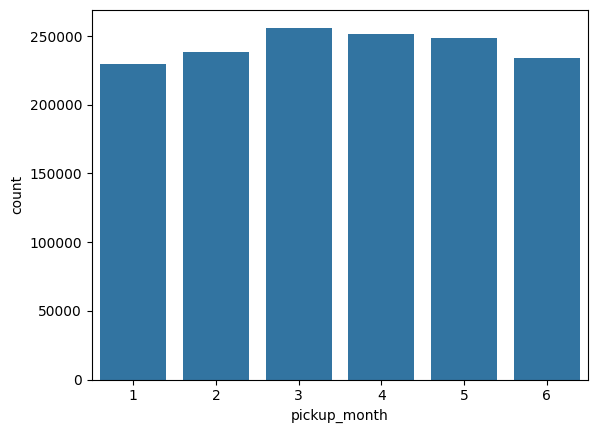

In [81]:
# count of total pickups each month

sns.countplot(data=train_df_new,x='pickup_month')
plt.show()

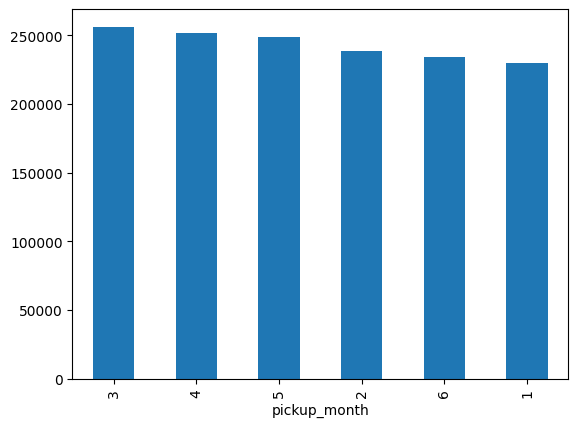

In [82]:
# pickups month wise in sorted order

train_df_new['pickup_month'].value_counts().sort_values(ascending=False).plot(kind='bar')

plt.show()

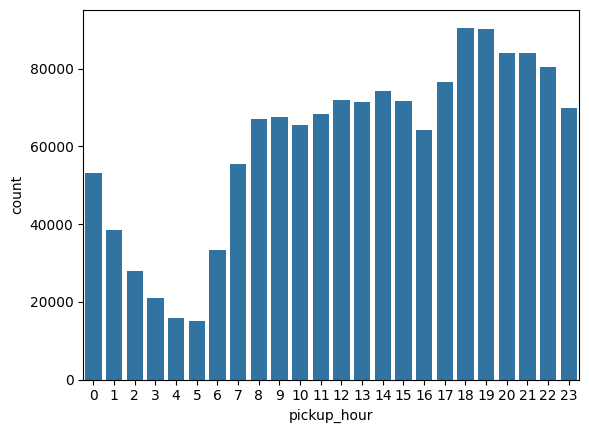

In [83]:
# rush hours for taxi pickups

sns.countplot(data=train_df_new,x='pickup_hour')
plt.show()

In [84]:
train_df_new.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_hour                    int32
pickup_date                    int32
pickup_month                   int32
pickup_day                     int32
is_weekend                     int32
dtype: object

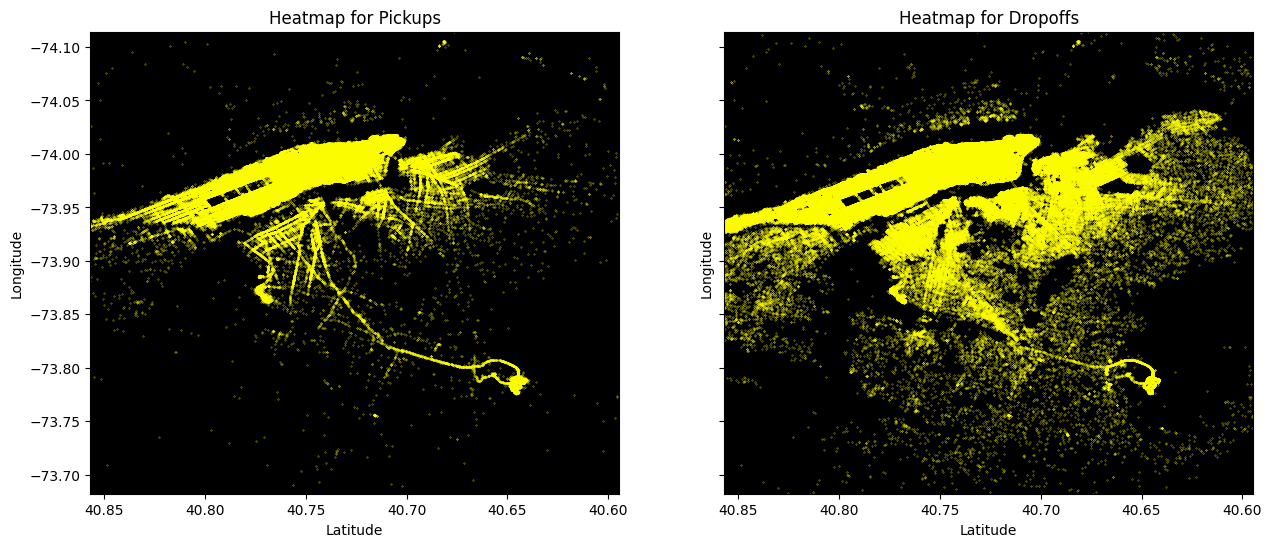

In [85]:
# heatmap of the pickups and dropoffs during the weekdays

temp_df = train_df_new.loc[train_df_new['is_weekend'] == 0,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df['pickup_latitude'],temp_df['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df['dropoff_latitude'],temp_df['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

##### Pickup/Dropoff Patterns during Weekend

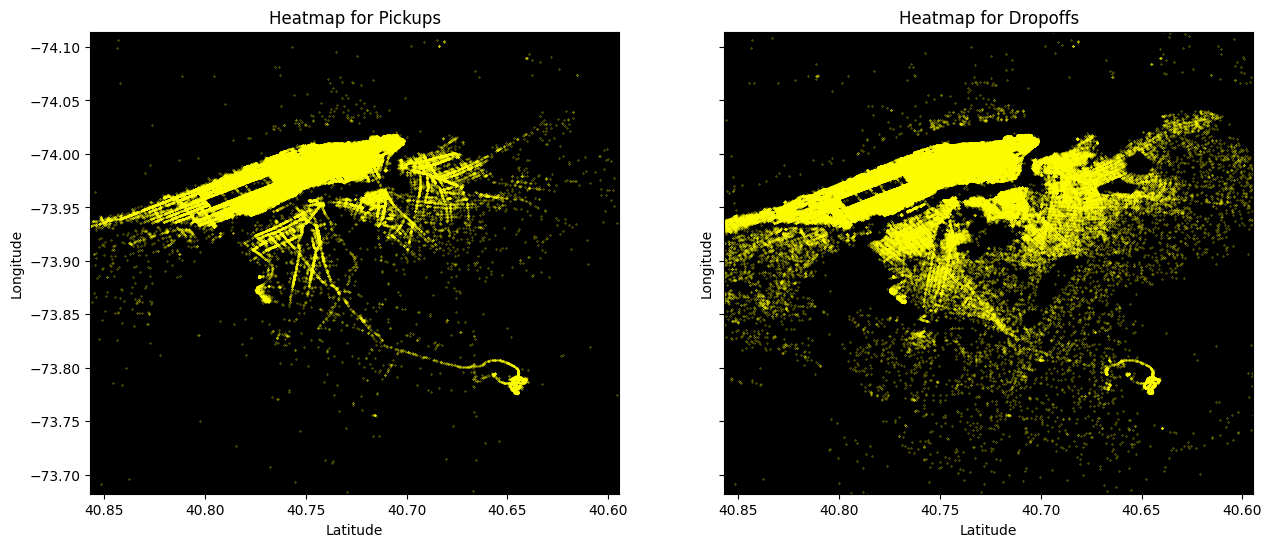

In [86]:
# heatmap of the pickups and dropoffs during the weekend

temp_df = train_df_new.loc[train_df_new['is_weekend'] == 1,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df['pickup_latitude'],temp_df['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df['dropoff_latitude'],temp_df['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

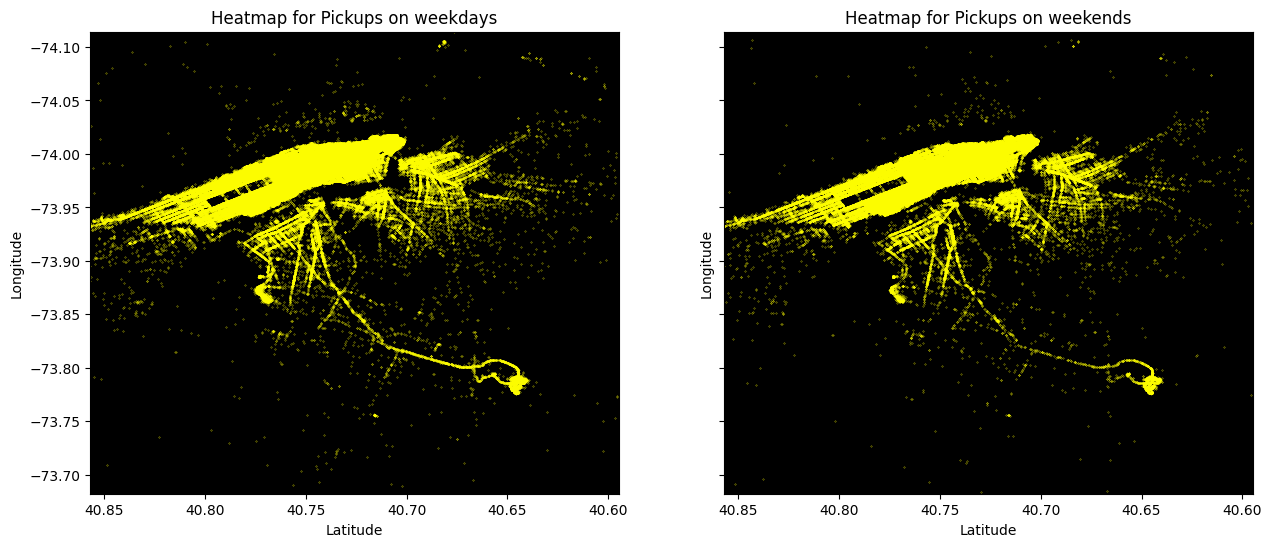

In [87]:
temp_df1 = train_df_new.loc[train_df_new['is_weekend'] == 0,:]
temp_df2 = train_df_new.loc[train_df_new['is_weekend'] == 1,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df1['pickup_latitude'],temp_df1['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups on weekdays')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df2['pickup_latitude'],temp_df2['pickup_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Pickups on weekends')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

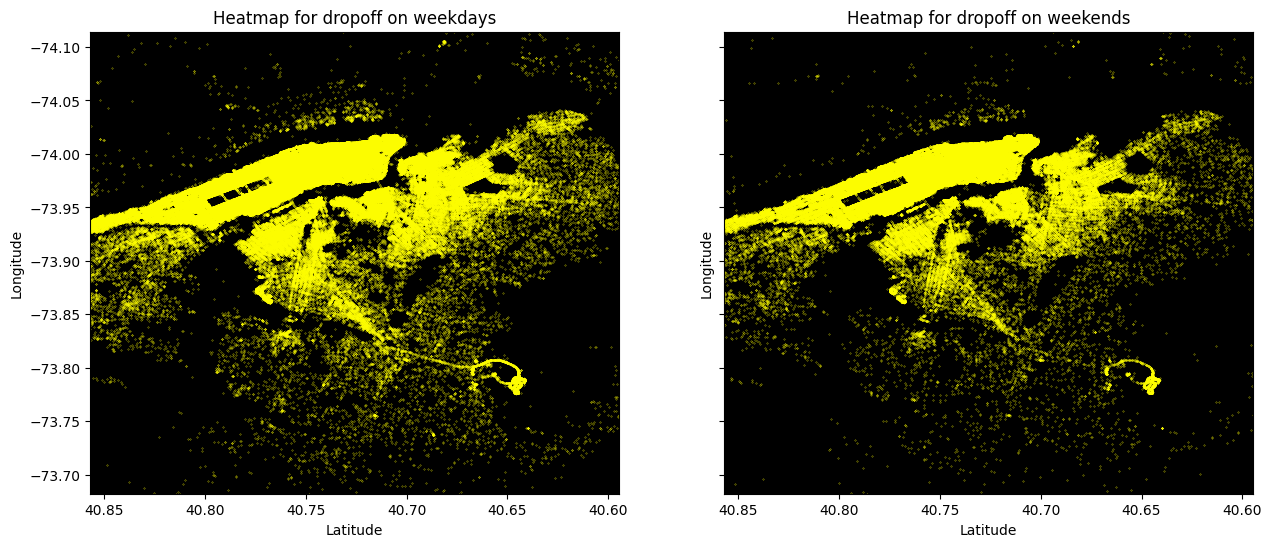

In [88]:
dropofftemp_df1 = train_df_new.loc[train_df_new['is_weekend'] == 0,:]
temp_df2 = train_df_new.loc[train_df_new['is_weekend'] == 1,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df1['dropoff_latitude'],temp_df1['dropoff_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for dropoff on weekdays')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df2['dropoff_latitude'],temp_df2['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for dropoff on weekends')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

## Pickup & Dropoff Latitude

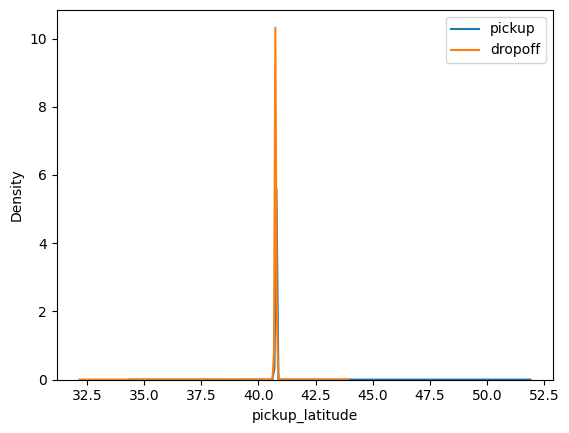

In [89]:
# distribution of the column
sns.kdeplot(train_df_new['pickup_latitude'],label='pickup')
sns.kdeplot(train_df_new['dropoff_latitude'],label='dropoff')
plt.legend()
plt.show()

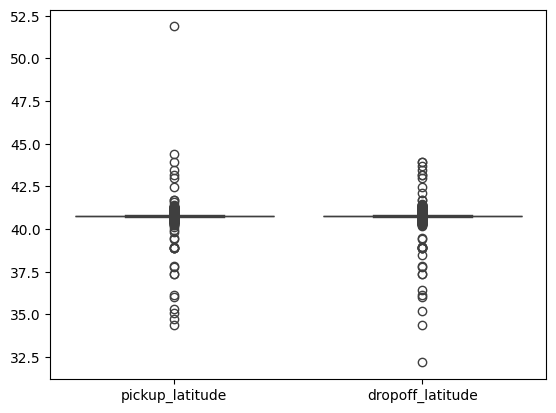

In [90]:
# plot boxplots
sns.boxplot(train_df_new[['pickup_latitude','dropoff_latitude']])
plt.show()

In [91]:
# get the min, max, median and mean values
train_df_new[['pickup_latitude','dropoff_latitude']].agg(['min','max','mean','median','std'])

,pickup_latitude,dropoff_latitude
min,34.359695,32.181141
max,51.881084,43.921028
mean,40.750921,40.751800
median,40.754101,40.754524
std,0.032881,0.035891


In [92]:
def compare_df_size(old_df,new_df):
    old_df_shape = old_df.shape
    new_df_shape = new_df.shape
    percentage_change = ((old_df_shape[0] - new_df_shape[0]) / old_df_shape[0]) * 100
    print(f'The shape of old dataframe is {old_df_shape}')
    print(f'The shape of new dataframe is {new_df_shape}')
    print(f'The difference of rows is {old_df_shape[0] - new_df_shape[0]}')
    print(f'The percentage of outliers removed are {percentage_change:.2f}')

In [93]:
# creating new dataframe without the outliers and then study the distribution
# outliers should be removed using the IQR approach
def remove_outliers(dataframe,column_names,fold=1.5):
    filtered_df = dataframe.copy()
    for column_name in column_names:
        Q1, Q3 = dataframe[column_name].quantile([0.25,0.75])
        IQR = Q3 - Q1
        upper_bound = Q3 + (fold*IQR)
        lower_bound = Q1 - (fold*IQR)
        filtered_df = filtered_df.loc[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound),:].copy()
    compare_df_size(old_df=dataframe,new_df=filtered_df)
    return filtered_df

In [94]:
# remove the outliers from the pickup_latitude/dropoff_latitude column
df_without_outliers = remove_outliers(dataframe=train_df_new,
                                    column_names=['pickup_latitude','dropoff_latitude',
                                                  'pickup_longitude','dropoff_longitude'],
                                    fold=3)

# This is not desired as there is more loss in training data than needed as seen below

The shape of old dataframe is (1458640, 15)
The shape of new dataframe is (1341135, 15)
The difference of rows is 117505
The percentage of outliers removed are 8.06


## Pickup & Dropoff Longitude

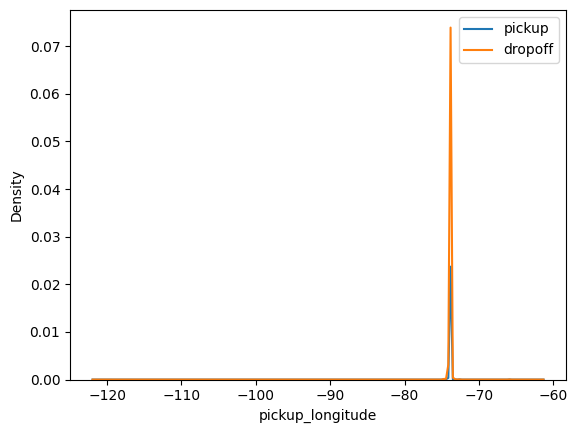

In [95]:
# distribution of the column
sns.kdeplot(train_df_new['pickup_longitude'],label='pickup')
sns.kdeplot(train_df_new['dropoff_longitude'],label='dropoff')
plt.legend()
plt.show()

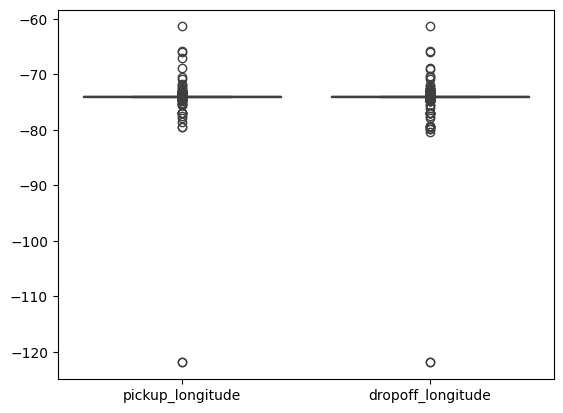

In [96]:
# plot boxplots
sns.boxplot(train_df_new[['pickup_longitude','dropoff_longitude']])
plt.show()

In [97]:
# get the min, max, median and mean values
train_df_new[['pickup_longitude','dropoff_longitude']].agg(['min','max','mean','median'])

,pickup_longitude,dropoff_longitude
min,-121.933342,-121.933304
max,-61.335529,-61.335529
mean,-73.973487,-73.973416
median,-73.981743,-73.979752


In [111]:
def plot_boxplots(data,columns):
    div, rem = divmod(len(columns),2)
    number_of_rows = div + rem
    number_of_columns = 2
    fig = plt.figure(figsize=(10,8))
    for ind,col in enumerate(columns):
        plt.subplot(number_of_rows,number_of_columns,ind+1)
        sns.boxplot(data=data,y=col,whis=3)
        plt.tight_layout()
    plt.show()

In [110]:
def plot_kdeplots(data,columns):
    div, rem = divmod(len(columns),2)
    number_of_rows = div + rem
    number_of_columns = 2
    fig = plt.figure(figsize=(10,8))
    for ind,col in enumerate(columns):
        plt.subplot(number_of_rows,number_of_columns,ind+1)
        sns.kdeplot(data=data,x=col)
        plt.tight_layout()
    plt.show()

In [100]:
normal_durations_df['trip_duration'].max()

199.56666666666666

In [101]:
normal_df_subset = normal_durations_df.iloc[:,5:9]

In [238]:
!pip install feature-engine

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/328.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.9 kB ? eta -:--:--
   -------- ------------------------------ 71.7/328.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------  327.7/328.9 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 328.9/328.9 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.0 MB 13.8 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/10.0 MB 13.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.0 MB 13.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.0 MB 15.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/10.0 MB 17.8 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/10.0 MB 18.9 MB/s eta 0:00:01
   ----------

In [102]:
from feature_engine.outliers import OutlierTrimmer
trimmer = OutlierTrimmer(capping_method='quantiles',
                        tail='both',fold=0.001,
                        variables=normal_df_subset.columns.to_list())
# remove the outliers
df_without_outliers = trimmer.fit_transform(normal_durations_df)

In [103]:
compare_df_size(normal_durations_df,df_without_outliers)

The shape of old dataframe is (1456548, 11)
The shape of new dataframe is (1446375, 11)
The difference of rows is 10173
The percentage of outliers removed are 0.70


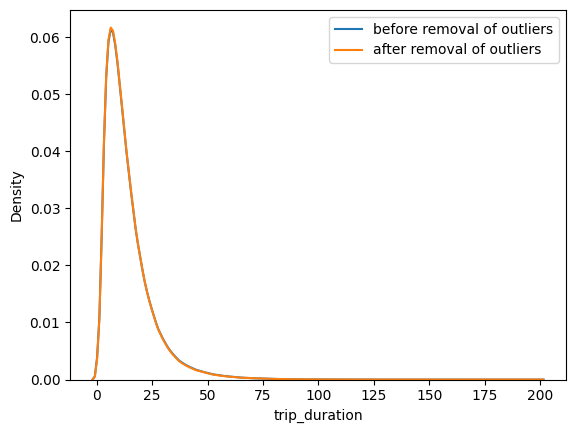

In [104]:
sns.kdeplot(data=normal_durations_df,x='trip_duration',label='before removal of outliers')
sns.kdeplot(data=df_without_outliers,x='trip_duration',label='after removal of outliers')
plt.legend()
plt.show()

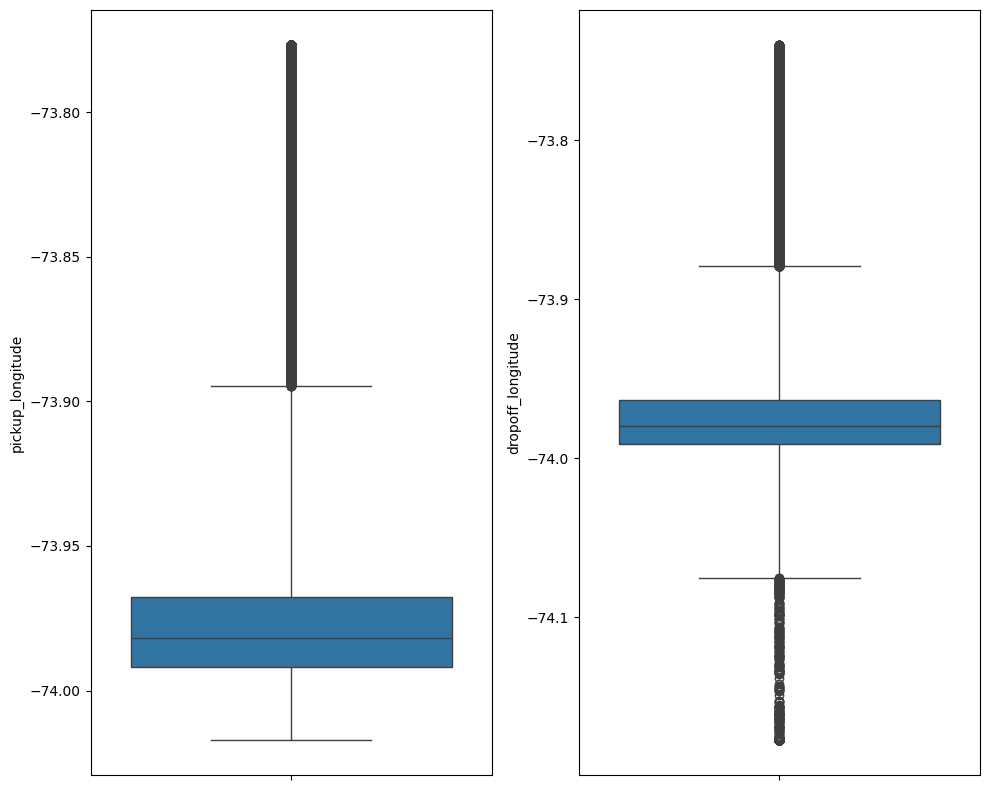

In [112]:
plot_boxplots(df_without_outliers,['pickup_longitude', 'dropoff_longitude'])

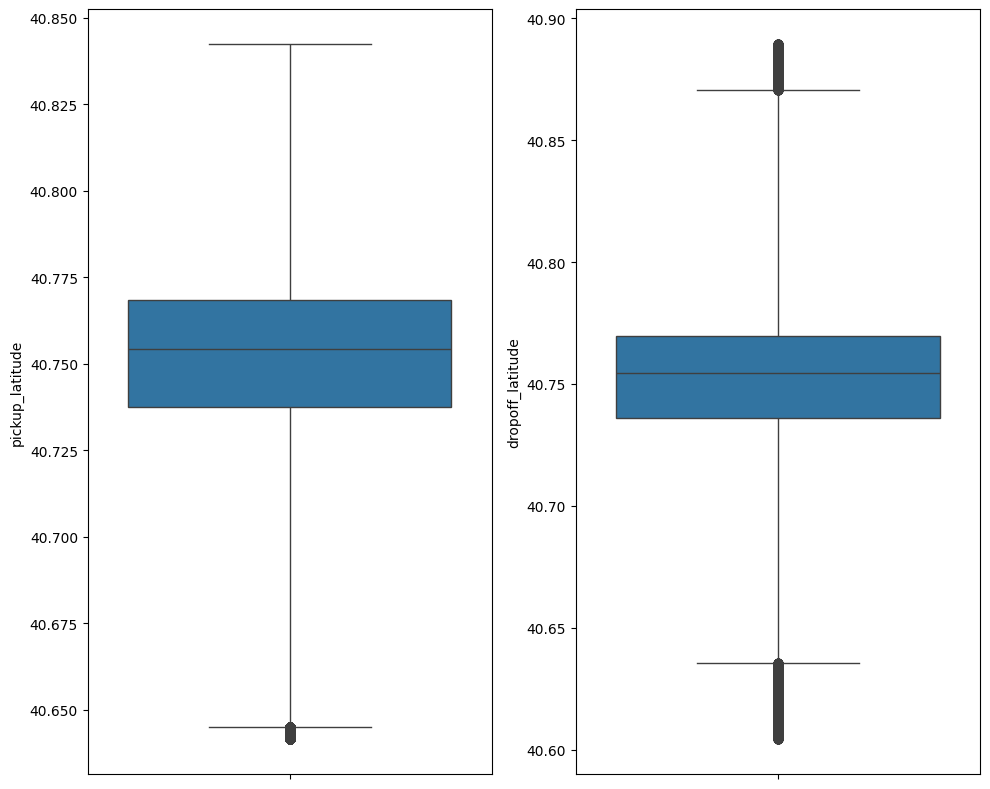

In [113]:
plot_boxplots(df_without_outliers,['pickup_latitude', 'dropoff_latitude'])

In [114]:
from sklearn.preprocessing import PowerTransformer

In [115]:
df_without_outliers[['pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'dropoff_latitude']].describe()

,pickup_longitude,dropoff_latitude,dropoff_longitude,dropoff_latitude
count,1.446375e+06,1.446375e+06,1.446375e+06,1.446375e+06
mean,-7.397387e+01,4.075191e+01,-7.397357e+01,4.075191e+01
std,3.695603e-02,3.111722e-02,3.358493e-02,3.111722e-02
min,-7.401722e+01,4.060420e+01,-7.417761e+01,4.060420e+01
25%,-7.399187e+01,4.073617e+01,-7.399131e+01,4.073617e+01
50%,-7.398178e+01,4.075459e+01,-7.397980e+01,4.075459e+01
75%,-7.396755e+01,4.076977e+01,-7.396322e+01,4.076977e+01
max,-7.377669e+01,4.088952e+01,-7.373986e+01,4.088952e+01


In [116]:
df_without_outliers.loc[(df_without_outliers['pickup_latitude'] == df_without_outliers['pickup_latitude'].min()),:]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
120228,id1906170,1,2016-01-09 22:32:08,2016-01-09 23:06:49,1,-73.788208,40.64151,-73.984116,40.720825,N,34.683333
188058,id3847366,1,2016-06-29 23:50:37,2016-06-30 00:23:20,1,-73.787994,40.64151,-73.987068,40.734283,N,32.716667
268188,id2939379,1,2016-06-18 20:56:17,2016-06-18 21:46:21,2,-73.787971,40.64151,-73.992371,40.756638,N,50.066667
357864,id2578987,1,2016-03-15 16:01:05,2016-03-15 16:46:21,1,-73.788368,40.64151,-73.957413,40.663593,N,45.266667
426572,id2520435,2,2016-04-05 17:49:51,2016-04-05 18:38:50,2,-73.788033,40.64151,-73.949181,40.784538,N,48.983333
483217,id1733131,1,2016-05-05 11:09:42,2016-05-05 11:59:42,2,-73.788010,40.64151,-73.979431,40.754852,Y,50.000000
485990,id2022839,1,2016-01-18 22:25:49,2016-01-18 22:58:11,2,-73.788132,40.64151,-73.993500,40.752308,N,32.366667
544976,id0803570,2,2016-01-12 23:18:04,2016-01-12 23:55:29,1,-73.788353,40.64151,-73.823143,40.863480,N,37.416667
770965,id1141844,1,2016-06-24 19:06:10,2016-06-24 19:52:04,1,-73.788666,40.64151,-73.936852,40.705795,N,45.900000
791962,id2792108,2,2016-03-13 18:30:17,2016-03-13 19:09:14,1,-73.788002,40.64151,-73.952057,40.717751,N,38.950000


In [117]:
# load the data
final_df = df_without_outliers.copy()

In [118]:
final_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,7.250000


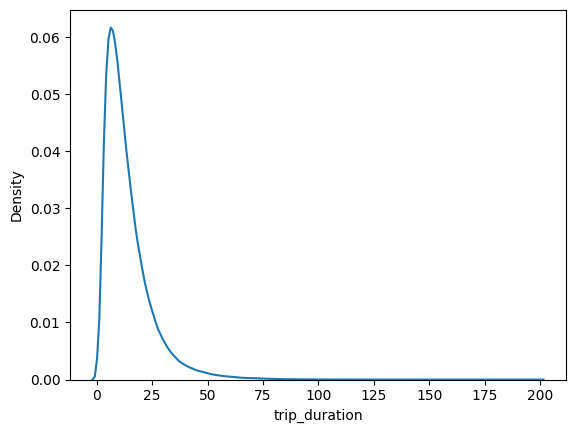

In [119]:
# kdeplot for the target column
sns.kdeplot(data=final_df,x='trip_duration')
plt.show()

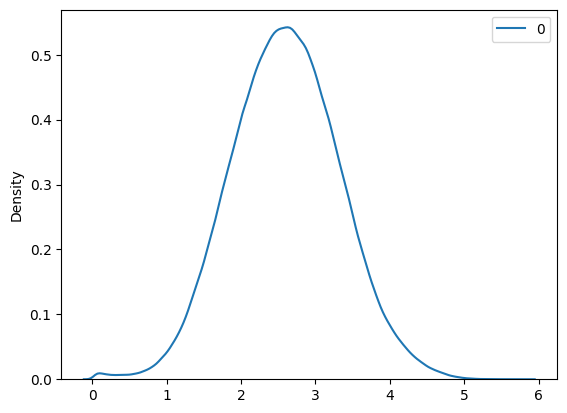

In [120]:
# apply yeo-johnson transformation

from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer(standardize=False)

# transform the output column

trip_duration_trans = pt_target.fit_transform(final_df[['trip_duration']])

sns.kdeplot(trip_duration_trans)
plt.show()

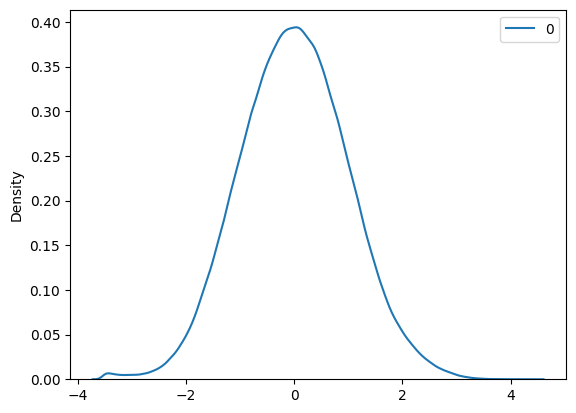

In [121]:
# apply yeo-johnson transformation

from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer(standardize=True)

# transform the output column

trip_duration_trans = pt_target.fit_transform(final_df[['trip_duration']])

sns.kdeplot(trip_duration_trans)
plt.show()

In [122]:
pd.DataFrame(trip_duration_trans,columns=['target']).skew()

target    0.000584
dtype: float64

In [123]:
np.mean(trip_duration_trans),np.std(trip_duration_trans)

(-3.0933509626025057e-16, 0.9999999999999998)

In [128]:
# save the data
df_without_outliers.to_csv(r'F:\MLOps\MLOps\data\processed\train.csv')

In [124]:
# value counts in passenger count column 
final_df['passenger_count'].value_counts()

passenger_count
1    1025171
2     208402
5      77378
3      59345
6      47902
4      28124
0         52
8          1
Name: count, dtype: int64

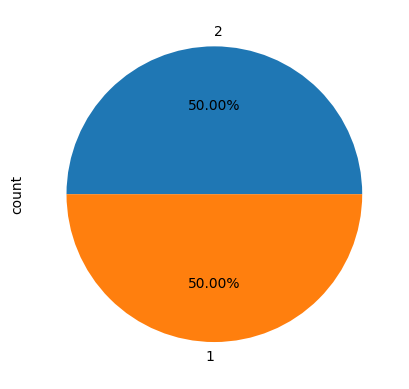

In [209]:
# vendor distribution for 0 passengers 
final_df.loc[(final_df['passenger_count'] == 0),'vendor_id'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

In [125]:
final_df.shape

(1446375, 11)

In [126]:
# remove the rows of data where passenger count is 8
final_df = final_df.drop(index=final_df[final_df['passenger_count'] == 8].index)
final_df.shape

(1446374, 11)

In [127]:
# unique values in the passenger count column
np.sort(final_df['passenger_count'].unique())

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

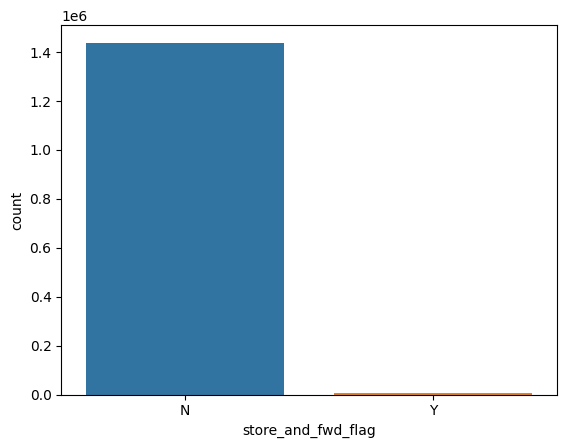

In [215]:
# distribution of "store and fwd flag" column
sns.countplot(data=final_df,x='store_and_fwd_flag')
plt.show()

#highly imbalanced column, so can be removed